#### (1) 데이터 가져오기

In [1]:
import pandas as pd
import os

csv_path = os.getenv("HOME") + "/data/data/bike-sharing-demand/train.csv"
train = pd.read_csv(csv_path)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])
type(train['datetime'])

pandas.core.series.Series

In [3]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


#### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

- sns.countplot 활용해서 시각화하기

- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

Text(0.5, 1.0, 'second')

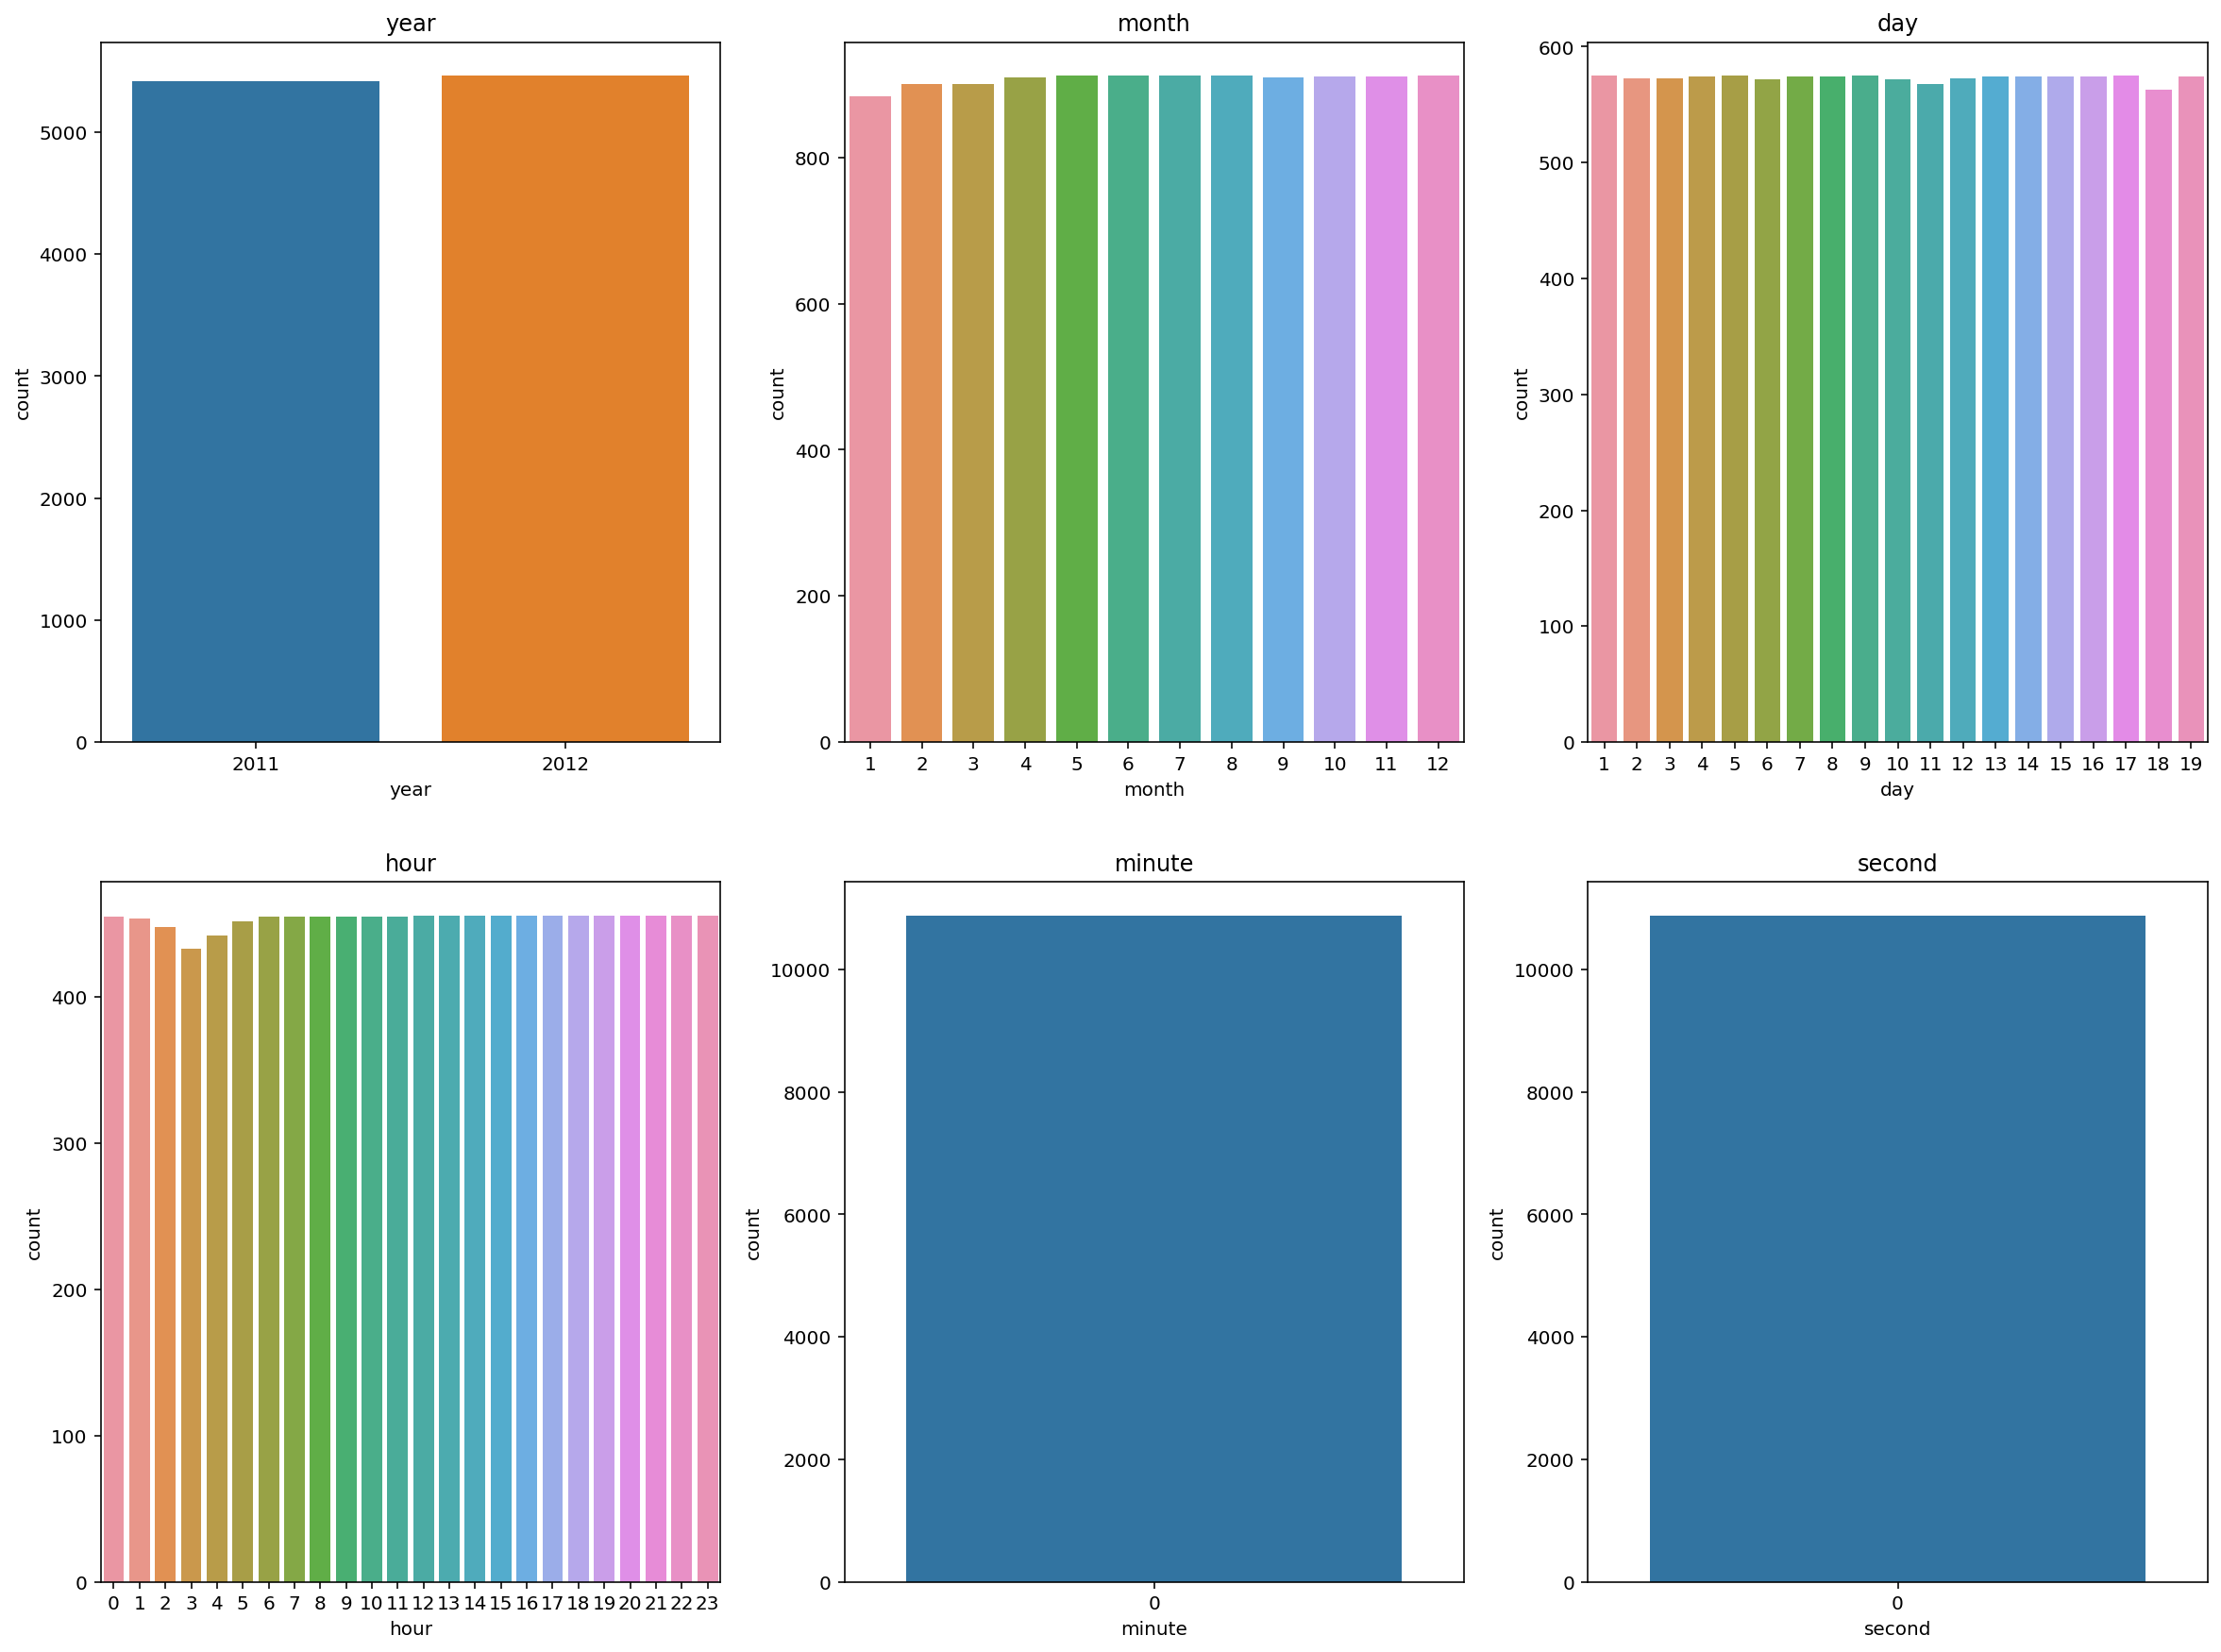

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(20, 15))
    
plt.subplot(231)
sns.countplot(x="year", data=train)
plt.title("year")

plt.subplot(232)
sns.countplot(x="month", data=train)
plt.title('month')

plt.subplot(233)
sns.countplot(x="day", data=train)
plt.title('day')

plt.subplot(234)
sns.countplot(x="hour", data=train)
plt.title('hour')

plt.subplot(235)
sns.countplot(x="minute", data=train)
plt.title('minute')

plt.subplot(236)
sns.countplot(x="second", data=train)
plt.title('second')

#### (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [5]:
del train['casual']
del train['registered']
del train['datetime']
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,0,0


In [30]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'day', 'hour', 'minute']].values
y = train['count'].values

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### (5) LinearRegression 모델 학습

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

#### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

- 학습된 모델에 X_test를 입력해서 예측값 출력하기

- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기

- mse 값과 함께 rmse 값도 계산하기

In [34]:
y_pred = model.predict(X_test)
y_pred

array([296.34167172,   9.02951898, 240.00939083, ..., 270.02590256,
        -8.86390143, 205.30284922])

In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

21648.70612510245

In [36]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

147.1349928640446

#### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기

- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

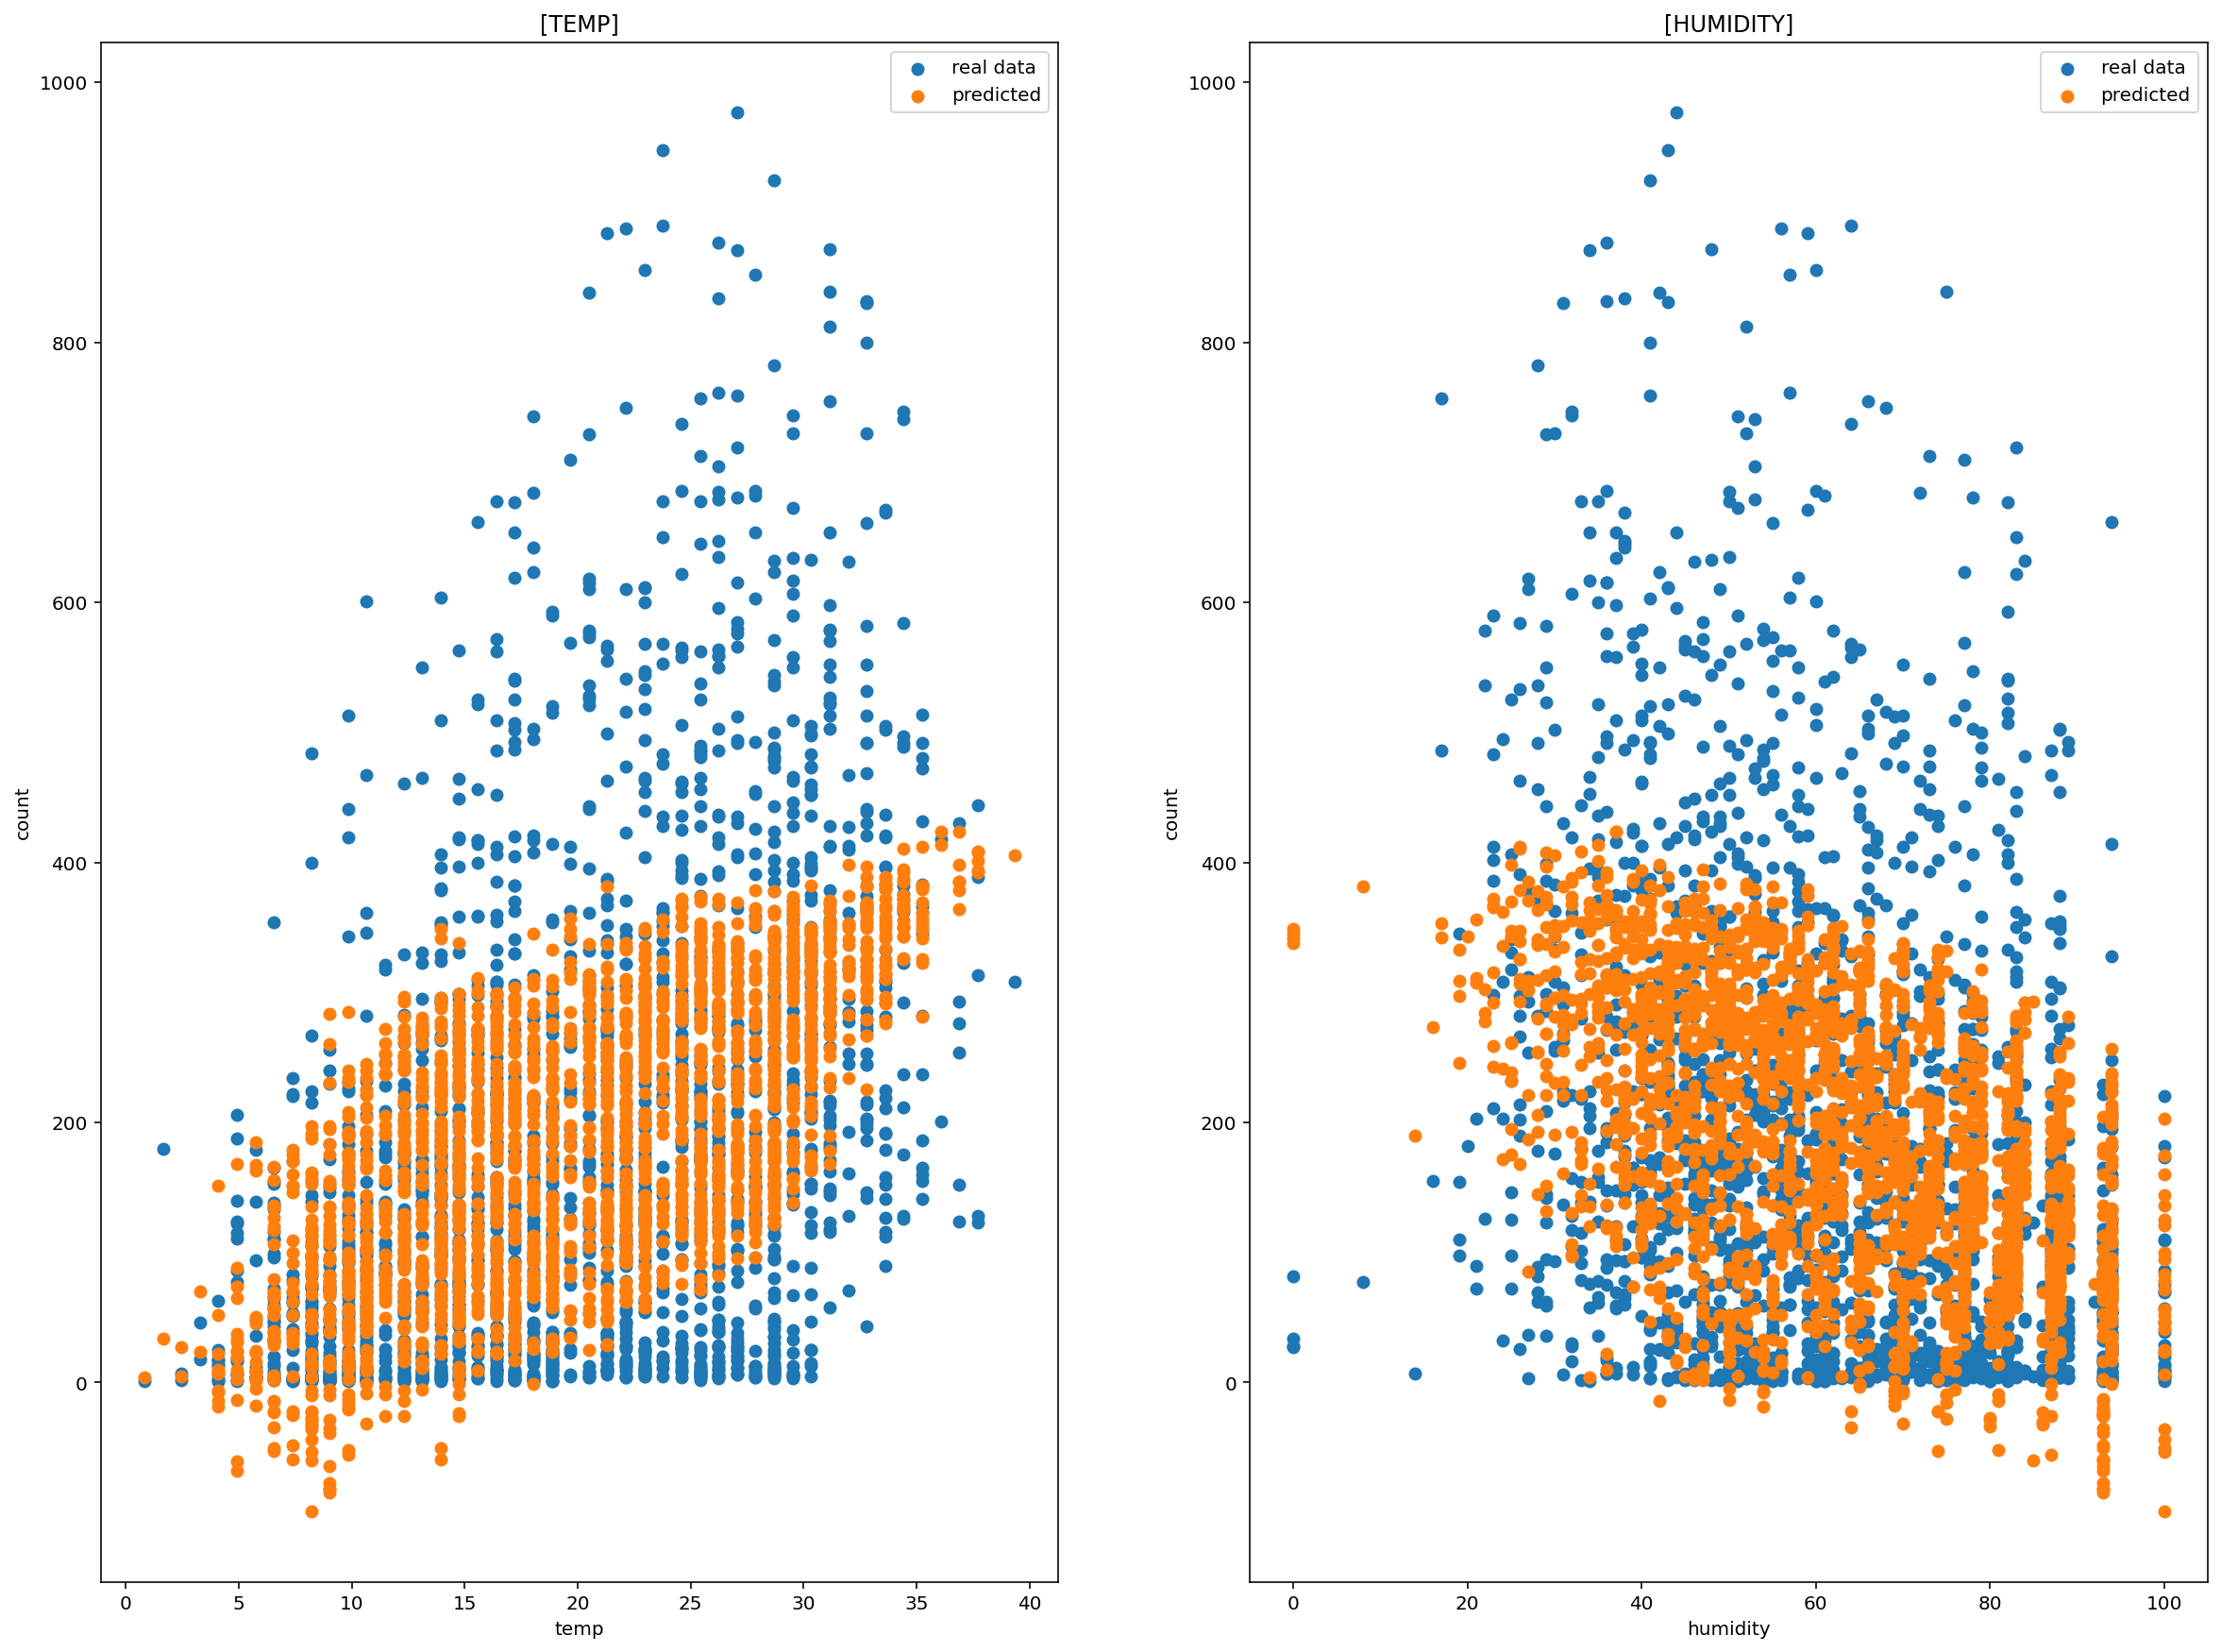

In [50]:
plt.figure(figsize=(20, 15))
    
plt.subplot(121)
plt.scatter(X_test[:, 4], y_test, label='real data')
plt.scatter(X_test[:, 4], y_pred, label='predicted')
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.title("[TEMP]")

plt.subplot(122)
plt.scatter(X_test[:, 6], y_test, label='real data')
plt.scatter(X_test[:, 6], y_pred, label='predicted')
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.title('[HUMIDITY]')

plt.show()